#                                          Python_Assignment1

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np


In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
df=pd.read_csv("C:\\Users\\Laptop-PC\\Documents\\python assgn1\\playstore-analysis.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


# 1.Data clean up-Missing value treatment

<b>  a.	Drop records where rating is missing since rating is our target/study variable

In [7]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
df.dropna(subset=['Rating'],inplace=True)

In [9]:
df.Rating.isnull().sum()

0

<b> b.	Check the null values for the Android Ver column. 

<b> i.	Are all 3 records having the same problem?
                    

In [10]:
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.00000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.00000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.52952,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


yes,all 3 records having null values

<b> ii.	Drop the 3rd record i.e. record for “Life Made WIFI …”

In [11]:
df.drop([10472],inplace=True)

In [12]:
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN



<b> iii.	Replace remaining missing values with the mode

In [13]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0],inplace=True)

In [14]:
print(df.loc[[4453]])
print(df.loc[[4490]])

                         App         Category  Rating Reviews     Size  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4     230  11000.0   

     Installs  Type  Price Content Rating           Genres   Last Updated  \
4453   1,000+  Paid  $1.49       Everyone  Personalization  July 20, 2018   

     Current Ver Android Ver  
4453         4.4  4.1 and up  
                       App         Category  Rating Reviews    Size Installs  \
4490  Pi Dark [substratum]  PERSONALIZATION     4.5     189  2100.0  10,000+   

      Type Price Content Rating           Genres    Last Updated Current Ver  \
4490  Free     0       Everyone  Personalization  March 27, 2018         1.1   

     Android Ver  
4490  4.1 and up  


After the replacement, Android Ver is 4.1  


<B> c.	Current ver – replace with most common value

In [15]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0],inplace=True)

In [16]:
df['Current Ver'].isnull().sum()

0

# 2.	Data clean up – correcting the data types

<b> a.	Which all variables need to be brought to numeric types?

reviews and installs need to be brought to numeric types.

<b> b.	Price variable – remove $ sign and convert to float

In [17]:
df['Price']=df['Price'].str.replace('$','')


df.loc[[4453]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,1.49,Everyone,Personalization,"July 20, 2018",4.4,4.1 and up


$ sign removed from price column 

In [18]:
df['Price']=df['Price'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.3+ MB


price column converted into float

<b> c.	Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [19]:
df['Installs']=df['Installs'].str.replace(',','')
df['Installs']=df['Installs'].str.replace('+','')
df['Installs']=df['Installs'].astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(1), object(9)
memory usage: 1.2+ MB


installs column converted into integer

In [21]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


    + and , removed from installs column

<b>  d.	Convert all other identified columns to numeric

In [22]:
df['Reviews']=df['Reviews'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.2+ MB


In [23]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,9.366000e+03,9366.000000,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,22705.733752,1.789744e+07,0.960928
std,0.515219,3.144042e+06,21305.040123,9.123822e+07,15.816585
min,1.000000,1.000000e+00,8.500000,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,5.930500e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.153275e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


# 3.	Sanity checks – check for the following and handle accordingly


<b>  a.	Avg. rating should be between 1 and 5, as only these values are allowed on the play store.


 <b> i.	Are there any such records? Drop if so.

In [24]:
df.loc[df.Rating < 1] & df.loc[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


No,there are no such records 

<b> b.	Reviews should not be more than installs as only those who installed can review the app.


<b>  i.	Are there any such records? Drop if so.


In [25]:
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.00000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.52952,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.00000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.00000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.00000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.00000,10,Free,0.00,Teen,Social,"July 23, 2018",1,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.00000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1,2.3 and up


yes,there are seven records where reviews is greater than installs

In [26]:
df.drop(df[df['Reviews'] > df['Installs']].index, inplace=True)

In [27]:
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# 4.	Identify and handle outliers – 

<b> a.	Price column

<b> i.	Make suitable plot to identify outliers in price 


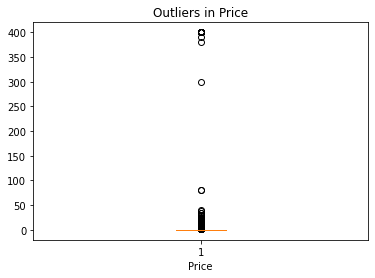

In [36]:
# boxplot is used for outliers

plt.boxplot(df['Price']);
plt.xlabel('Price');
plt.title('Outliers in Price');

<b> ii. Do you expect apps on the play store to cost $200? Check out these cases

In [40]:
df.loc[df['Price'] >= 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


yes,we can expect apps on the play store to cost $200

<b> iv.	Limit data to records with price < $30

In [41]:
df_1=df.loc[df['Price']< 30]
df_1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<b> iii.	After dropping the useless records, make the suitable plot again to identify outliers

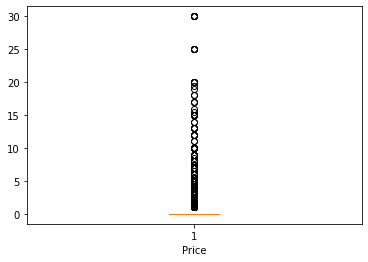

In [43]:
plt.boxplot(df_1['Price']);
plt.xlabel('Price');


<b> b.	Reviews column

<b> i.	Make suitable plot


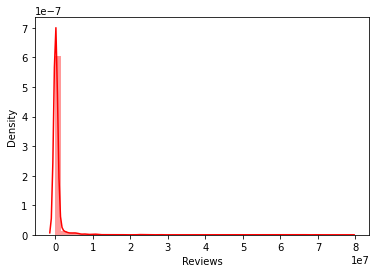

In [45]:
sb.distplot(df['Reviews'],color='r');


<b>  ii.	Limit data to apps with < 1 Million reviews

In [46]:
df_2=df[df['Reviews'] < 1000000]
df_2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [47]:
df_2.shape

(8655, 13)

total 8655 records of limited data to apps with < 1 mill reviews

<b> c.	Installs
    
<b> i.	What is the 95th percentile of the installs?


In [48]:
per=print('95th percentile of installs is :',df['Installs'].quantile(0.95))
per

95th percentile of installs is : 100000000.0


<b> ii.	Drop records having a value more than the 95th percentile

In [48]:
df.drop(df[df['Installs'] > per].index ,inplace=True)

In [49]:
df[df['Installs'] > per].index.value_counts().sum()

0

# Data analysis to answer business questions

<b> 5.	What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

<b>  a.	How do you explain this?

skewness of the distribution is : -1.8530611951252525
mean of this distribution is:  4.191174270755429
median of this distribution is:  4.3
mode of this distribution is:  0    4.4
dtype: float64


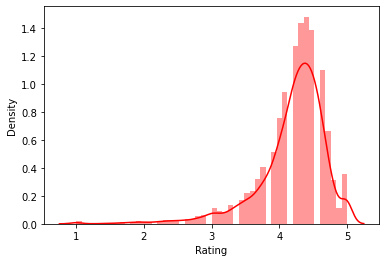

In [50]:
sb.distplot(df['Rating'],color='r');

print('skewness of the distribution is :',df.Rating.skew())
print('mean of this distribution is: ',df.Rating.mean())
print('median of this distribution is: ',df.Rating.median())
print('mode of this distribution is: ',df.Rating.mode())

<b> b.	What is the implication of this on your analysis?

After the Analysis, we can see that Mode is greater than Median and Median is greater than Mean i.e. 
distribution of rating is negatively skewed,therefore distribution of rating is more skewed towards lower values.

<b> 6.	What are the top Content Rating values?

<b> a.	Are there any values with very few records?


In [50]:
df['Content Rating'].value_counts()

Everyone           7414
Teen               1083
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

yes,there are two values Adults only 18+ and unrated with very few records

<b> b.	If yes, drop those as they won’t help in the analysis

In [51]:
df.drop(df[df['Content Rating']=='Adults only 18+'].index,inplace=True)
df.drop(df[df['Content Rating']=='Unrated'].index,inplace=True)

In [52]:
df['Content Rating'].value_counts()

Everyone        7414
Teen            1083
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64


<b> 7.	Effect of size on rating

<b> a.	Make a joinplot to understand the effect of size on rating


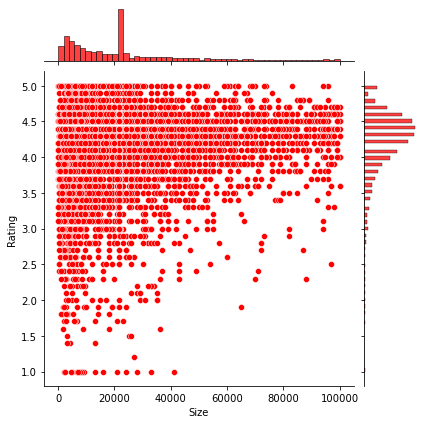

In [54]:
sb.jointplot(data=df,x='Size',y='Rating',color='r');

<b> b.	Do you see any patterns?

yes, there is correlation b/w size and rating

<b> c.	How do you explain the pattern?

we can see that max data points are occured in 4.0 to 4.5 rating and size is also increases,

that means this is a positive correlation b/w size and rating

In [55]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068399,0.078886,0.051636,-0.021899
Reviews,0.068399,1.000000,0.125459,0.641600,-0.009826
Size,0.078886,0.125459,1.000000,0.075375,-0.025648
Installs,0.051636,0.641600,0.075375,1.000000,-0.011898
Price,-0.021899,-0.009826,-0.025648,-0.011898,1.000000


<b> 8.	Effect of price on rating

<b> a.	Make a jointplot (with regression line)


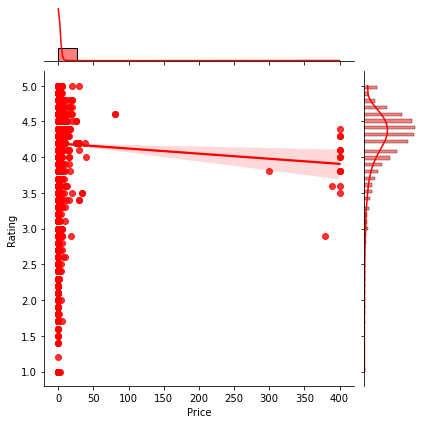

In [63]:
sb.jointplot(data=df,x='Price',y='Rating',kind='reg',color='r');

<b> b.	What pattern do you see?

we can see that when price is increasing,rating almost constant but it lies b/w 4 to 4.5

<b>  c.	How do you explain the pattern?

price is increasing and rating almost const but rating lies b/w 4 to 4.5 we can say that there is a weak positive correlation b/w rating and price 

<b>  d.	Replot the data, this time with only records with price > 0

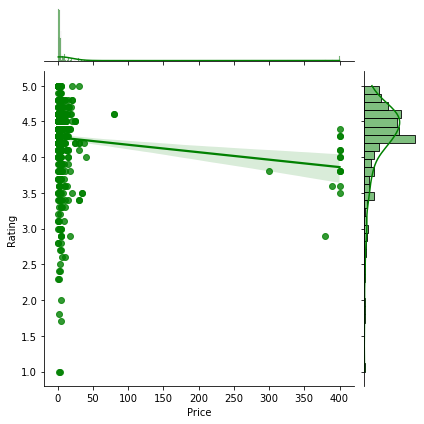

In [65]:
df_3=df[df['Price'] > 0]

sb.jointplot(data=df_3,x='Price',y='Rating',kind='reg',color='g');

<b> e.	Does the pattern change?

yes,there is a slight change in pattern

<b> f.	What is your overall inference on the effect of price on the rating

after limit the record with price > 0, it doesn't have significant effect on rating almost constant but there is a negative correlation b/w price and rating

In [61]:
df_3.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.044118,0.116286,0.060133,-0.112165
Reviews,0.044118,1.000000,0.035571,0.867304,-0.015098
Size,0.116286,0.035571,1.000000,0.075057,-0.077510
Installs,0.060133,0.867304,0.075057,1.000000,-0.023623
Price,-0.112165,-0.015098,-0.077510,-0.023623,1.000000


<b> 9.	Look at all the numeric interactions together – 

<b> a.	Make a pairplot with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'


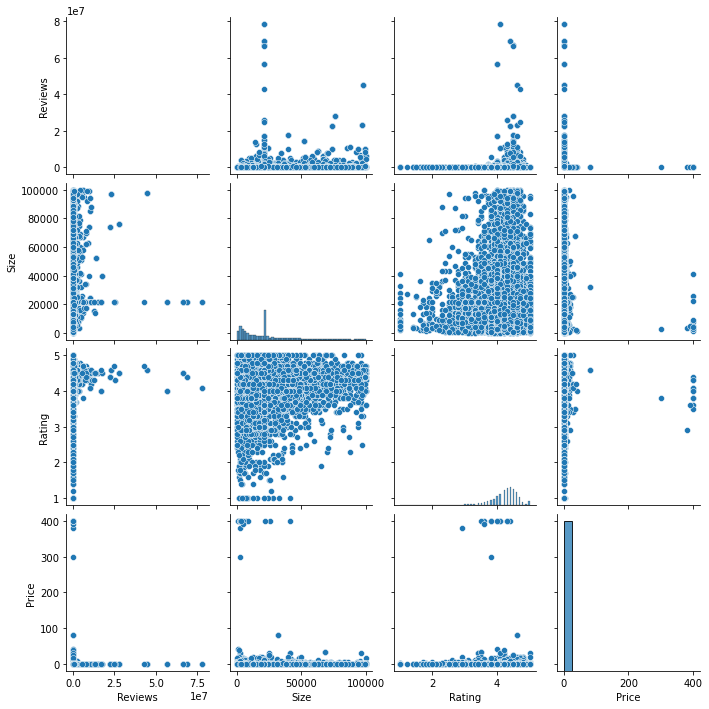

In [66]:
sb.pairplot(data=df,vars=['Reviews','Size','Rating','Price']);


<b> 10.	Rating vs. content rating

<b> a.	Make a bar plot displaying the rating for each content rating


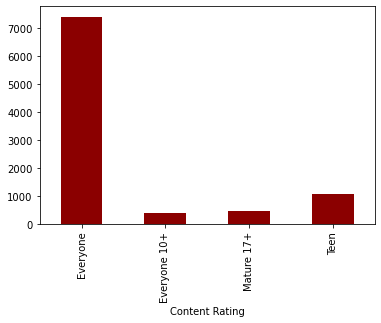

In [67]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color="darkred");


<b>  b.	Which metric would you use? Mean? Median? Some other quantile?

<b>  c.	Choose the right metric and plot


median, because we have outliers in rating and for outliers median is the best measure of central tendency

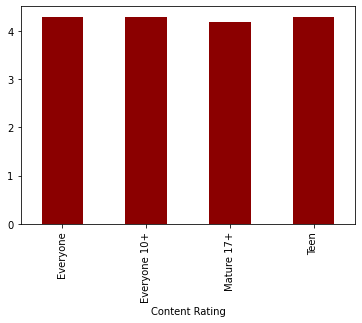

In [68]:
df.groupby(['Content Rating'])['Rating'].median().plot.bar(color="darkred");


<b> 11.	Content rating vs. size vs. rating – 3 variables at a time

<b> a.	Create 5 buckets (20% records in each) based on Size


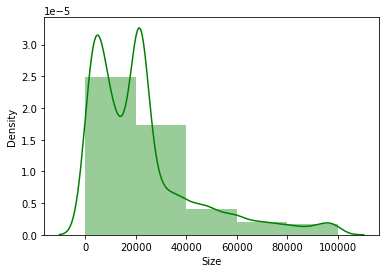

In [75]:
sb.distplot(df['Size'],bins=5,color='g');

In [76]:
bins=[0,20000,40000,60000,80000,100000]
df['Bucket Size']=pd.cut(df['Size'],bins,labels=['0-20000','20000-40000','40000-60000','60000-80000','80000-100000'])
pd.pivot_table(data=df,values='Rating',index='Bucket Size',columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20000,4.148721,4.247561,4.015183,4.187047
20000-40000,4.228845,4.197802,4.195109,4.237590
40000-60000,4.192505,4.265957,4.202222,4.270896
60000-80000,4.271774,4.374000,4.190909,4.291045
80000-100000,4.280000,4.405556,4.252632,4.314815


<b> b.	By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [79]:
tmp=pd.pivot_table(data=df,values='Rating',index='Bucket Size',columns='Content Rating',aggfunc=lambda x:np.quantile(x,0.2))
tmp

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20000,3.8,4.02,3.5,3.9
20000-40000,4.0,4.00,4.0,4.0
40000-60000,3.9,4.10,4.1,4.0
60000-80000,4.0,4.20,4.0,4.0
80000-100000,4.1,4.30,4.0,4.1


<b> c.	Make a heatmap of this

<b> i.	Annotated


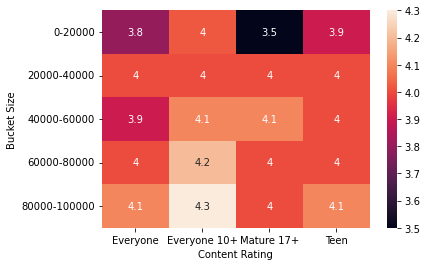

In [92]:
sb.heatmap(tmp,annot=True);

<b> ii.	Greens color map

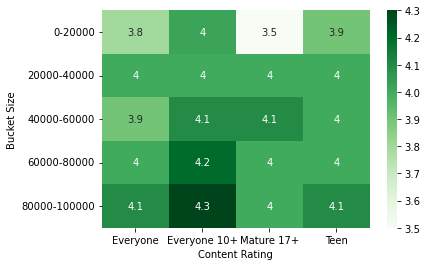

In [85]:
sb.heatmap(tmp,annot=True,cmap='Greens');

<b> d.	What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

After the analysis,can't say like lighter apps are preferred in all categories.
Because Bucket size 60000-80000 & 80000-100000 have got the highest rating in all categories. 
therefore my inference is that heavier apps are preferred in all categories.